First 5 rows of the dataset:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  C

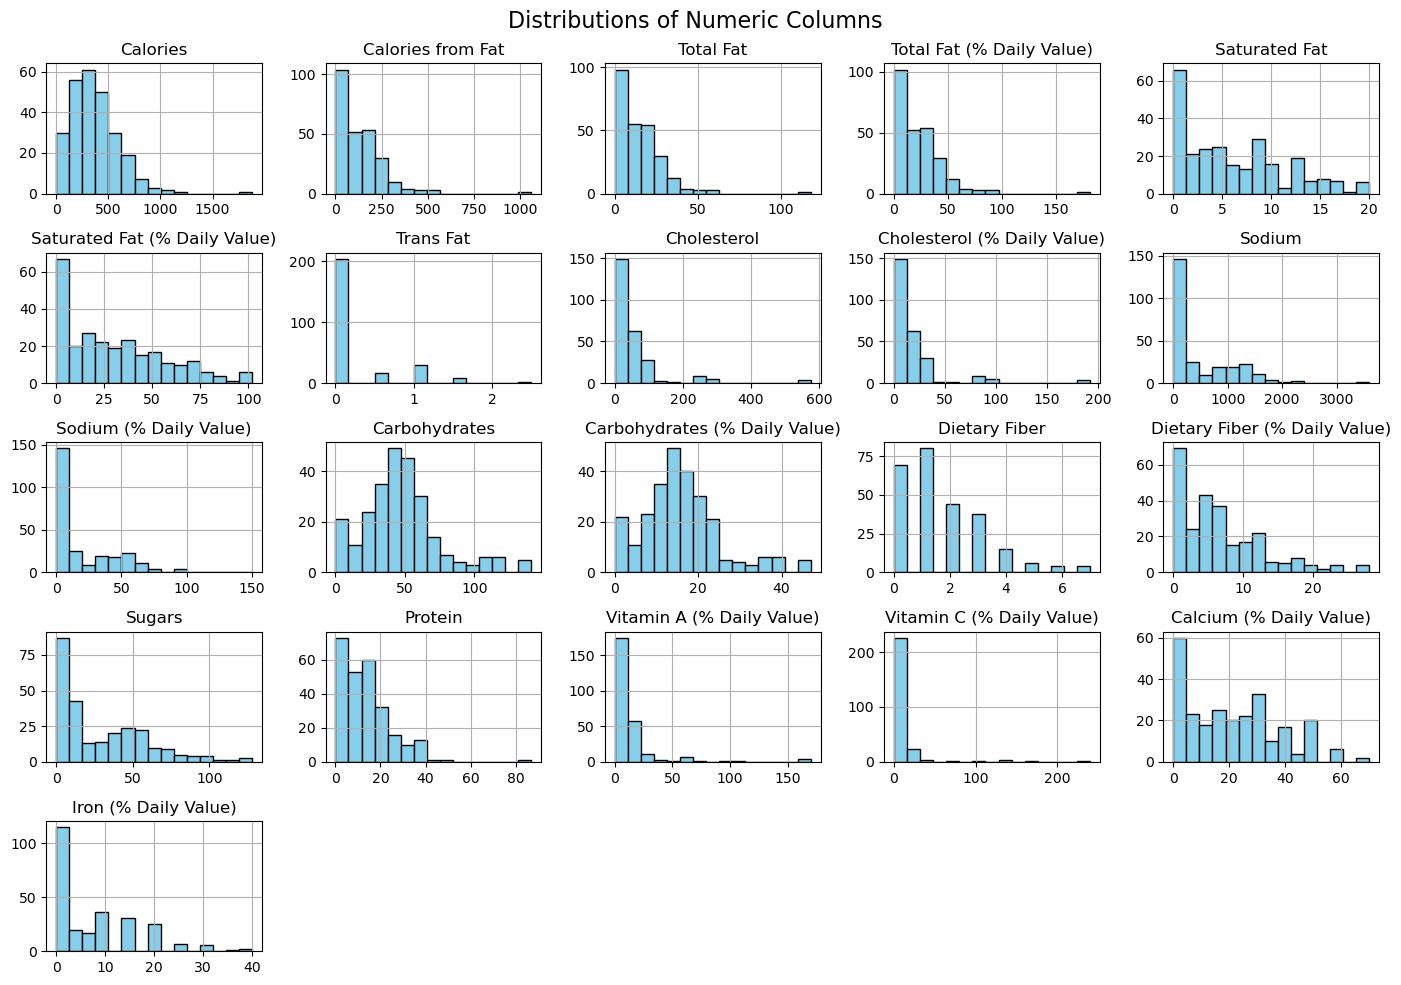


Category-wise Summary Statistics:
                      Calories  Calories from Fat  Total Fat  \
Category                                                       
Beef & Pork         494.000000         224.666667  24.866667   
Beverages           113.703704           0.740741   0.092593   
Breakfast           526.666667         248.928571  27.690476   
Chicken & Fish      552.962963         242.222222  26.962963   
Coffee & Tea        283.894737          71.105263   8.021053   
Desserts            222.142857          64.285714   7.357143   
Salads              270.000000         108.333333  11.750000   
Smoothies & Shakes  531.428571         127.678571  14.125000   
Snacks & Sides      245.769231          94.615385  10.538462   

                    Total Fat (% Daily Value)  Saturated Fat  \
Category                                                       
Beef & Pork                         38.600000      10.466667   
Beverages                            0.148148       0.055556   
Brea

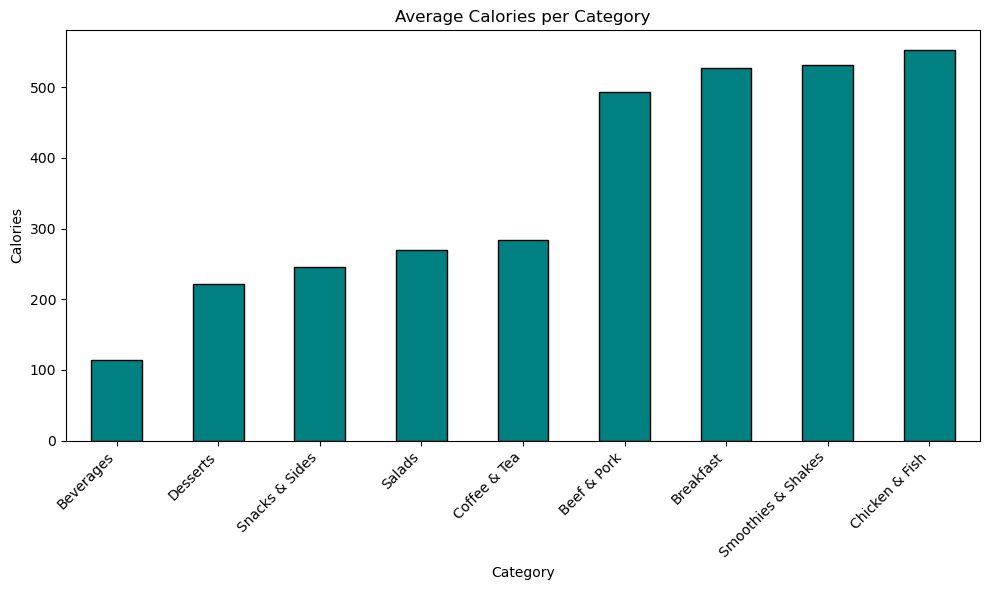


Correlation Matrix:
                                Calories  Calories from Fat  Total Fat  \
Calories                       1.000000           0.904588   0.904409   
Calories from Fat              0.904588           1.000000   0.999663   
Total Fat                      0.904409           0.999663   1.000000   
Total Fat (% Daily Value)      0.904123           0.999725   0.999765   
Saturated Fat                  0.845564           0.847008   0.846707   
Saturated Fat (% Daily Value)  0.847631           0.849592   0.849293   
Trans Fat                      0.522441           0.433686   0.431453   
Cholesterol                    0.596399           0.682161   0.680547   
Cholesterol (% Daily Value)    0.595208           0.681607   0.680000   
Sodium                         0.712309           0.846624   0.846158   
Sodium (% Daily Value)         0.713415           0.847276   0.846780   
Carbohydrates                  0.781539           0.461672   0.461213   
Carbohydrates (% Daily Value)

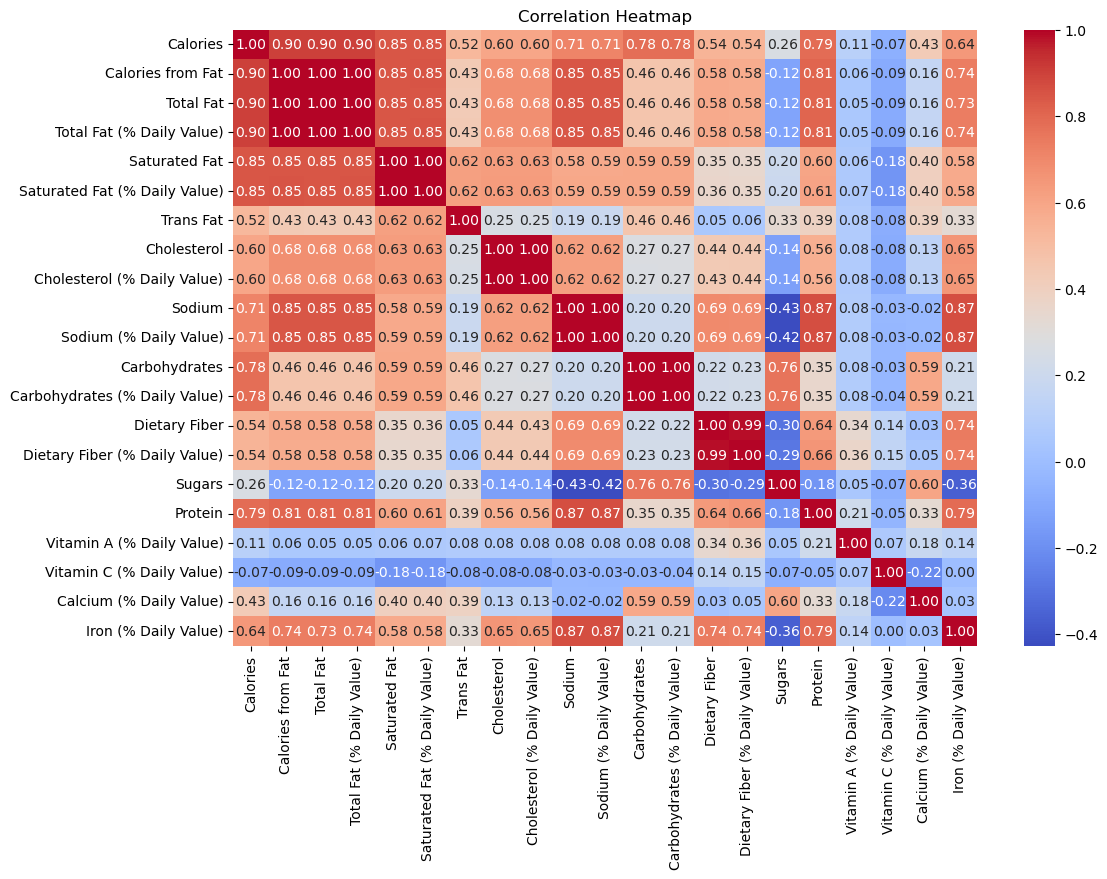


Top 5 Items with Highest Calories:
                                                 Item        Category  \
82                       Chicken McNuggets (40 piece)  Chicken & Fish   
32        Big Breakfast with Hotcakes (Large Biscuit)       Breakfast   
31      Big Breakfast with Hotcakes (Regular Biscuit)       Breakfast   
34  Big Breakfast with Hotcakes and Egg Whites (La...       Breakfast   
33  Big Breakfast with Hotcakes and Egg Whites (Re...       Breakfast   

    Calories  
82      1880  
32      1150  
31      1090  
34      1050  
33       990  

Top 5 Items with Lowest Fat:
                           Item        Category  Total Fat
100                  Side Salad  Snacks & Sides        0.0
101                Apple Slices  Snacks & Sides        0.0
110   Coca-Cola Classic (Small)       Beverages        0.0
111  Coca-Cola Classic (Medium)       Beverages        0.0
112   Coca-Cola Classic (Large)       Beverages        0.0

Recommendations:
1. Focus on offering low-calorie,

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Asus\Desktop\menu.csv")

# Step 1: Data Inspection
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Step 2: Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("\nDuplicate Rows:", duplicates)

# Step 3: Descriptive Statistics
# Calculate basic statistics
print("\nMode of the dataset:")
print(data.mode().iloc[0])
# Ensure that the 'Calories' and 'Total Fat' columns are numeric
data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')  # Convert to numeric, set errors to NaN
data['Total Fat'] = pd.to_numeric(data['Total Fat'], errors='coerce')  # Convert to numeric, set errors to NaN

# Now you can safely calculate the mean values
# Group by Category and calculate mean values
category_summary = data.groupby("Category").mean(numeric_only=True)  # Use numeric_only=True to avoid non-numeric columns
print("\nCategory-wise Summary Statistics:")
print(category_summary)

# Visualize the distribution of numeric columns
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
data[numeric_columns].hist(figsize=(14, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()
# Step 4: Category-wise Analysis
# Group by Category and calculate mean values, ensuring only numeric columns are considered
category_summary = data.groupby("Category").mean(numeric_only=True)  # Added numeric_only=True
print("\nCategory-wise Summary Statistics:")
print(category_summary)

# Average calories per category
category_calories = data.groupby("Category")["Calories"].mean(numeric_only=True).sort_values()  # Added numeric_only=True

plt.figure(figsize=(10, 6))
category_calories.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Average Calories per Category")
plt.ylabel("Calories")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Step 5: Correlation and Heatmap
# Correlation matrix
correlation_matrix = data[numeric_columns].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Actionable Insights
# Example Insight: Items with the highest calories
top_calories = data.nlargest(5, "Calories")[["Item", "Category", "Calories"]]
print("\nTop 5 Items with Highest Calories:")
print(top_calories)

# Example Insight: Items with lowest fat
lowest_fat = data.nsmallest(5, "Total Fat")[["Item", "Category", "Total Fat"]]
print("\nTop 5 Items with Lowest Fat:")
print(lowest_fat)

# Recommendations
print("\nRecommendations:")
print("1. Focus on offering low-calorie, high-protein items to cater to health-conscious customers.")
print("2. Reduce sodium and sugar content in certain items to align with dietary guidelines.")
